In [ ]:
#Libraries for the Algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import io

In [ ]:
#uploading dataset
from google.colab import files
uploaded = files.upload()

Saving outliers-3.csv to outliers-3.csv


In [ ]:
#Reading Dataset
df = pd.read_csv(io.BytesIO(uploaded['outliers-3.csv']))
df.head()

,X1,X2
0,36.76,34.53
1,83.84,74.11
2,36.22,25.51
3,89.61,68.73
4,90.27,73.57


In [ ]:
# current shape of our dataframe 
df.shape

(199, 2)

Text(0.5, 1.0, 'Plot without detecting outliers')

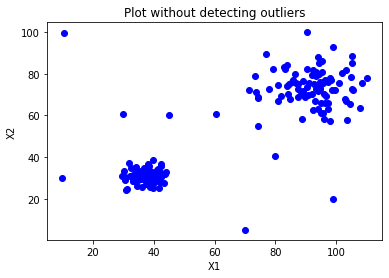

In [ ]:
plt.scatter(df['X1'],df['X2'],c='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot without detecting outliers')

In [ ]:
# for easier computational purposes we will rename X1 and X2 to x and y
x = df['X1']
y = df['X2']

#### LOF Algorithm:

In [ ]:
# Manhattan Distance Function
def getManhattanDist(p1,p2):
  """"We are finding distance between points p1 and p2"""
  return abs(x.iloc[p1]-x.iloc[p2]) + abs(y.iloc[p1]-y.iloc[p2])

# Euclidean Distance Function
def get_euclidean_distance(p1, p2):
    return math.sqrt((x.iloc[p1] - x.iloc[p2]) ** 2 + abs(y.iloc[p1] - y.iloc[p2]) ** 2)

# Finding neighbours in k-neighbourhood
def find_neighbours(i,x,k,flag):
  temp_nk = dict() 
  n=[]
  n_dist=[]

  for j in range(len(x)):
    if i==j:
      continue
    else:
      dist = get_euclidean_distance(i,j)
      temp_nk[j] = dist
  
  temp_nk={s: t for s, t in sorted(temp_nk.items(), key=lambda item:item[1], reverse=False)}
  
  j=1
  for s,t in temp_nk.items():
    if j>k:
       break
    n_dist.append(t)
    n.append(s)
    j= j + 1

  return n, n_dist, n_dist[k-1]

# Calculating Rechability Distance
def calc_rd(i):
  counter=0
  global rdsum
  rdsum = 0
  for j in nk[i]:
    rd[i][j] = float(max(kdist[j], nk_dist[i][counter]))
    rdsum = rdsum + rd[i][j]
    counter = counter + 1

#Calculate Local Rechability Distance
def calc_lrd(i, rdsum):
  lrd[i] = float(1/(rdsum/k))

# Calculate Local Outlier Factor
def calc_lof(i):
  lrdsum=0
  for j in nk[i]:
    lrdsum = lrdsum + lrd[j]
  lof[i] = (lrdsum/(lrd[i]*k))
 


#### We will now calculate rd, lrd, lof, nk, nk_dist for all points

In [ ]:
# Some key terms
"""rd: rechability distance
lrd: local rechability desity
lof: local outlier factor
nk: Neighbours in k-neibourhood"""


# Setting a value for k
k = 5

#initializing variables as list
rd=[]
lrd=[]
lof=[]
nk=[]
nk_dist=[]
outlier=[]
temp=[]
kdist=[]


for i in range(len(x)):
  for j in range(len(y)):
    temp.append(0)
  rd.append(temp)
  lrd.append(0)
  lof.append(-1) #since lof can never be -1, initalizing it as -1
  nk.append(0)
  nk_dist.append(0)
  kdist.append(0)

# Now we will calculate LOF for all the points
for i in range(len(x)):
  if nk[i]==0:
    nk[i],nk_dist[i], kdist[i] = find_neighbours(i,x,k,0)
  calc_rd(i)
  calc_lrd(i,rdsum)

for i in range(len(x)):
  calc_lof(i)


# Now we will seperate outliers from non outliers bases on the set threshold
out_x=[]
out_y=[]
non_out_x=[]
non_out_y=[]

# Setting a threshold
threshold = 2.2

for i in range(len(lof)):
  if lof[i] > threshold:
    outlier.append(i)
    out_x.append(x.iloc[i])
    out_y.append(y.iloc[i])
  else:
    non_out_x.append(x.iloc[i])
    non_out_y.append(y.iloc[i])

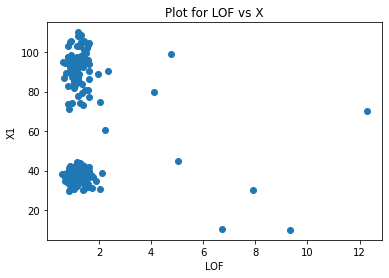

In [ ]:
# Plot for finding good threshold
plt.scatter(lof,x)
plt.xlabel('LOF')
plt.ylabel('X1')
plt.title('Plot for LOF vs X')
plt.show()

#### Data Visualization

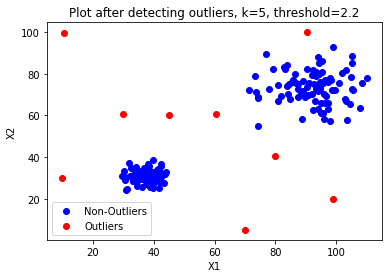

In [ ]:
plt.scatter(non_out_x,non_out_y,c='blue', label='Non-Outliers' )
plt.scatter(out_x,out_y,c='red', label='Outliers')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot after detecting outliers, k=5, threshold=2.2')
plt.legend()
plt.show()